<a href="https://colab.research.google.com/github/EsauHervert/DRP-Machine-Learning/blob/master/Linear_Regression_f(x)_%3D_w0_%2B_w1x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have done the case where $f(x) = wx$, now let us look at the case where $f(x) = w^0 + w^1x$. Define the vector $w = (w^0, w^1)$, we can define the following:

Given an arbitrary $w = (w^0,w^1)$, the loss is defined as:

$$\mathcal{L}(X,Y,w) = \frac{1}{2n}\sum_{i=1}^n\left(w^0 + w^1x_i - y_i)\right)^2$$

Its gradient is the following:

$$\nabla_w\mathcal{L}(X,Y,w) = \left(\frac{\partial}{\partial w_0}\mathcal{L}(X,Y,w), \frac{\partial}{\partial w_1}\mathcal{L}(X,Y,w)\right)$$

where

\begin{align*}
  \frac{\partial}{\partial w_0}\mathcal{L}(X,Y,w) &= \frac{\partial}{\partial w_0}\frac{1}{2n}\sum_{i=1}^n\left(w^0 + w^1x_i - y_i)\right)^2 \\
  &= \frac{1}{n}\sum_{i=1}^n(w^0 + w^1x_i - y_i)\frac{\partial}{\partial w_0}(w^0 + w^1x_i - y_i)\\
  &= \frac{1}{n}\sum_{i=1}^n(w^0 + w^1x_i - y_i)
\end{align*}

\begin{align*}
  \frac{\partial}{\partial w_1}\mathcal{L}(X,Y,w) &= \frac{\partial}{\partial w_1}\frac{1}{2n}\sum_{i=1}^n\left(w^0 + w^1x_i - y_i)\right)^2 \\
  &= \frac{1}{n}\sum_{i=1}^n(w^0 + w^1x_i - y_i)\frac{\partial}{\partial w_1}(w^0 + w^1x_i - y_i)\\
  &= \frac{1}{n}\sum_{i=1}^n(w^0 + w^1x_i - y_i)*x_i
\end{align*}

$$\therefore 
So now our gradient update rule:

$$w_{j+1} = w_{j} - \eta \nabla_w\mathcal{L}(X,Y,w_j)$$

defining the following:

$$\tilde{x}_i = \begin{bmatrix}
1\\
x_i
\end{bmatrix}$$

We can define the following:

$$w^t\tilde{x}_i = w_0+w_1x_i$$

$$\nabla_w\mathcal{L}(X,Y,w) = \frac{1}{n}\sum_{i=1}^n(w^T\tilde{x}_i - y_i)*\tilde{x}_i := \delta(w)$$

Thus the update rule becomes:

$$w_{j+1} = w_j - \eta\delta(w_j)$$



In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import time

Our target function will be the function $f(x) = 2 - 3x$ on the interval $[-1,1]$. We will first do everything in terms of vanilla gradient descent.

In [0]:
X = torch.arange(-1,1,0.01)
n = X.numpy().size
X = torch.reshape(X, (1, n))
Y = 2 - 3*X
print(Y.size())

torch.Size([1, 200])


Now since we are given a vector $X = [x_1 x_2 \cdots x_n]$ and we need to instead have a matrix $\tilde{X} = [\tilde{x}_1 \tilde{x}_2\cdots\tilde{x}_n]$, we do the following:

In [0]:
Ones = torch.ones(1,n)
Xt = torch.cat((Ones, X), 0)
print(Xt.size())

torch.Size([2, 200])


To simplify our calculations, we will define the following:

$$e_i = w^T\tilde{x}_i - y_i$$

$$E = w^T\tilde{X} - Y$$

$$\therefore \delta(w) =  \frac{1}{n}\sum_{i=1}^ne_i*\tilde{x}_i  = (E\circ\tilde{X}).mean(1)$$

In [0]:
def GradDescent(X, Y, w, eta, N, t):
  t_0 = time.time()
  n,m = X.size()
  for j in range(N):
    wT = torch.transpose(w, 0, 1)
    E = torch.mm(wT, X) - Y
    if E.norm(p=2) <= t:
      break
    delta = (E*X).mean(1)
    delta = torch.reshape(delta, (n, 1))
    w -= eta*delta
  t_1 = time.time()
  print("total time = ",t_1 - t_0)
  return w

In [0]:
def sGradDescent(X, Y, w, eta, N, s, t):
  t_0 = time.time()
  n,m = X.size()
  for j in range(N):
    perm = torch.randperm(m)
    perm = perm[0:s]
    Xpi = X[:,perm]
    #print(Xpi.size())
    Ypi = Y[0,perm]
    #print(Ypi.size())
    wT = torch.transpose(w, 0, 1)
    #print(wT)
    Epi = torch.mm(wT, Xpi) - Ypi
    if Epi.norm(p=2) <= t:
      break
    delta = (Epi*Xpi).mean(1)
    delta = torch.reshape(delta, (n,1))
    w -= eta*delta
  t_1 = time.time()
  print("total time = ",t_1-t_0)
  return w

Now let us initialize a $w$ and see how it performs:

In [0]:
w = torch.rand(2,1)
w_new = w.clone()
w_new_s = w.clone()
print(w)
print(Y.size())

tensor([[0.4340],
        [0.6091]])
torch.Size([1, 200])


We will define a function that will take in the inputs and a predeterminded weights and get an output based on the weights.

In [0]:
def f(w,x):
  wT = torch.transpose(w, 0, 1)
  return torch.mm(wT, x)
def loss(w,x,y):
  return f(w,x) - y

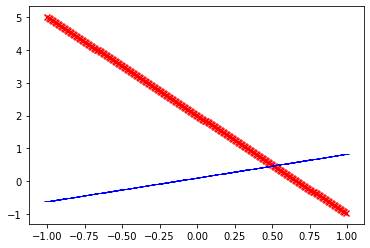

In [0]:
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(X, f(w, Xt), marker = '_', color = 'blue')
ax1.scatter(X, Y, marker='x', color='red')

Now let us run our gradient descent to see what kind of value we get.


In [0]:
w_new = GradDescent(Xt, Y, w_new, 0.01, 1000, 0.01)
w_new_s = sGradDescent(Xt, Y, w_new_s, 0.01, 1000, 50, 0.01)
print(w_new)
print(w_new_s)

total time =  0.09580349922180176
total time =  0.13677334785461426
tensor([[ 2.0009],
        [-2.8724]])
tensor([[ 2.0017],
        [-2.8735]])


In [0]:
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(X, f(w_new, Xt), marker = '_', color = 'blue')
ax1.scatter(X, Y, marker='x', color='red')

TypeError: ignored

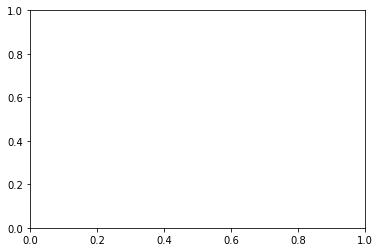

In [0]:
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(X, loss(w_new, Xt), marker = '_', color = 'blue')
ax1.plot(X, loss(w_new_s), marker='x', color='red')

In [0]:
print(abs(-5))

5
